In [2]:
import pandas as pd
import os

In [5]:
os.listdir('./data/')

['incidents_test.csv', 'incidents_dev.csv', 'incidents_train.csv']

In [23]:
traindf = pd.read_csv('./data/incidents_train.csv')
devdf = pd.read_csv('./data/incidents_dev.csv')

In [8]:
solution = pd.read_csv('./submission_folder/submission.csv')
solution

,hazard,product
0,listeria monocytogenes,ground beef
1,listeria monocytogenes,ground beef
2,listeria monocytogenes,ground beef
3,peanuts and products thereof,peanuts
4,listeria monocytogenes,ground beef
...,...,...
560,milk and products thereof,salads
561,milk and products thereof,cakes
562,plastic fragment,cookies
563,peanuts and products thereof,biscuits


In [15]:
concated_dev = pd.concat([devdf, solution], axis=1)
concated_dev = concated_dev[['title', 'text', 'hazard','product']]
concated_dev

,title,text,hazard,product
0,Recall Notification: FSIS-017-94,Case Number: 017-94 \r\n Date Ope...,listeria monocytogenes,ground beef
1,Recall Notification: FSIS-048-94,Case Number: 048-94 \r\n Date Ope...,listeria monocytogenes,ground beef
2,Recall Notification: FSIS-032-95,Case Number: 032-95 \r\n Date Ope...,listeria monocytogenes,ground beef
3,Archive - ALLERGY ALERT -- PRESENCE OF UNDECLA...,PRESENCE OF UNDECLARED NUTS IN ORIGINALE AUGUS...,peanuts and products thereof,peanuts
4,Recall Notification: FSIS-018-98,Case Number: 018-98 Recall Notification Repor...,listeria monocytogenes,ground beef
...,...,...,...,...
560,The Fresh Salad Co Thai Coconut Wild Rice Prep...,Page Content ​ ​​​​ ​Date publ...,milk and products thereof,salads
561,Powered by Plants Pty Ltd — Cleanfit Plant Pro...,PRA number 2022/19525 Published date 18 Jul 20...,milk and products thereof,cakes
562,Certain Enjoy Life brand Soft Baked Cookies – ...,Food recall warning Certain Enjoy Life brand S...,plastic fragment,cookies
563,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,peanuts and products thereof,biscuits


In [17]:
from collections import Counter

Counter(concated_dev['product'])

Counter({'ground beef': 21,
         'peanuts': 13,
         'sandwiches': 6,
         'milk': 5,
         'cakes': 73,
         'cheese': 19,
         'salmon': 15,
         'ready to eat - cook meals': 46,
         'bread': 2,
         'ice cream': 101,
         'noodles': 1,
         'sausage': 5,
         'muesli': 1,
         'chicken based products': 84,
         'breakfast cereals': 1,
         'other not classified meat products': 5,
         'biscuits': 5,
         'yoghurt': 5,
         'potato chips': 5,
         'cookies': 30,
         'crackers': 2,
         'soup': 5,
         'beef': 1,
         'eggs': 1,
         'alfalfa sprouts': 2,
         'jellies': 1,
         'salads': 23,
         'thermal processed pork meat': 8,
         'ham': 1,
         'dried apricots': 4,
         'pistachio nuts': 5,
         'beef products': 3,
         'pork sausage': 1,
         'dried beef meat': 1,
         'coconut juice': 2,
         'coconuts': 3,
         'Catfishes (freshwater

In [28]:
import matplotlib.pyplot as plt
def plot_categorical_frequencies(data_column, title="Category Frequency", xlabel="Category", ylabel="Frequency"):
    # Calculate the frequency of each category
    frequency_counts = data_column.value_counts()
    print(type(frequency_counts))
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(frequency_counts.index, frequency_counts.values, color='skyblue')
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Rotate x-tick labels for better visibility if necessary
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

<class 'pandas.core.series.Series'>


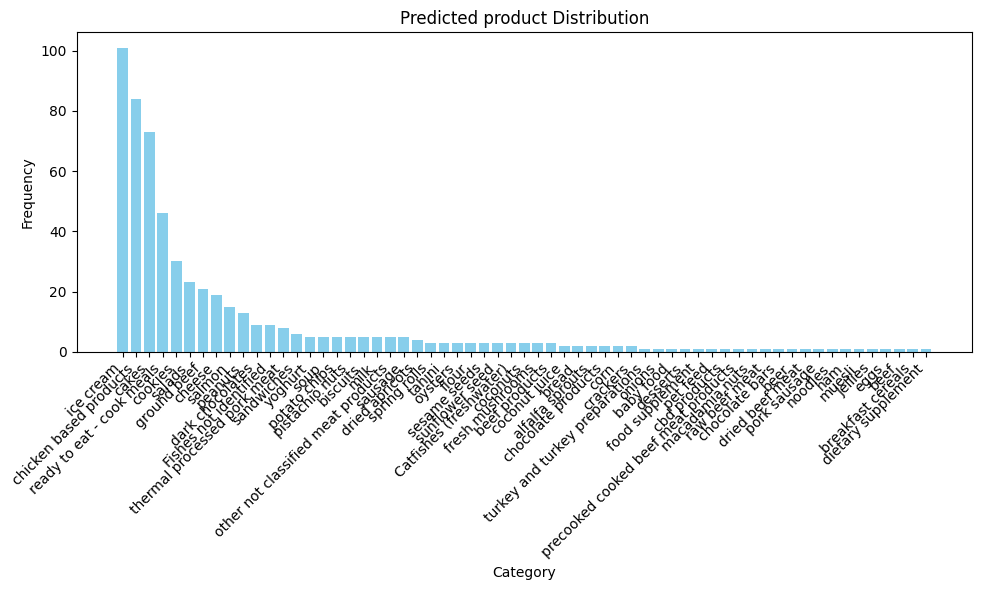

In [31]:
plot_categorical_frequencies(concated_dev['product'], title='Predicted product Distribution')

<class 'pandas.core.series.Series'>


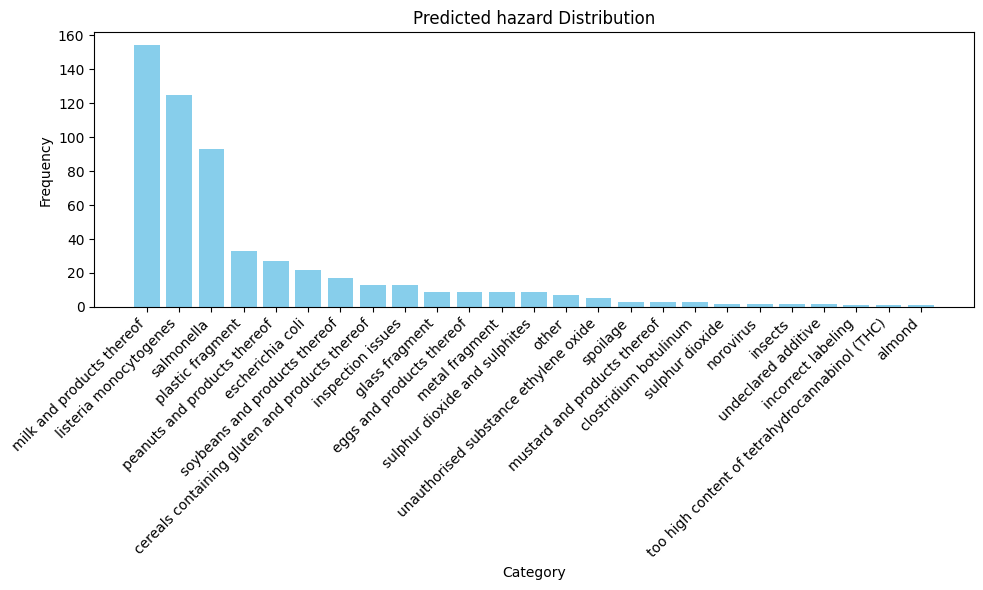

In [32]:
plot_categorical_frequencies(concated_dev['hazard'], title='Predicted hazard Distribution')

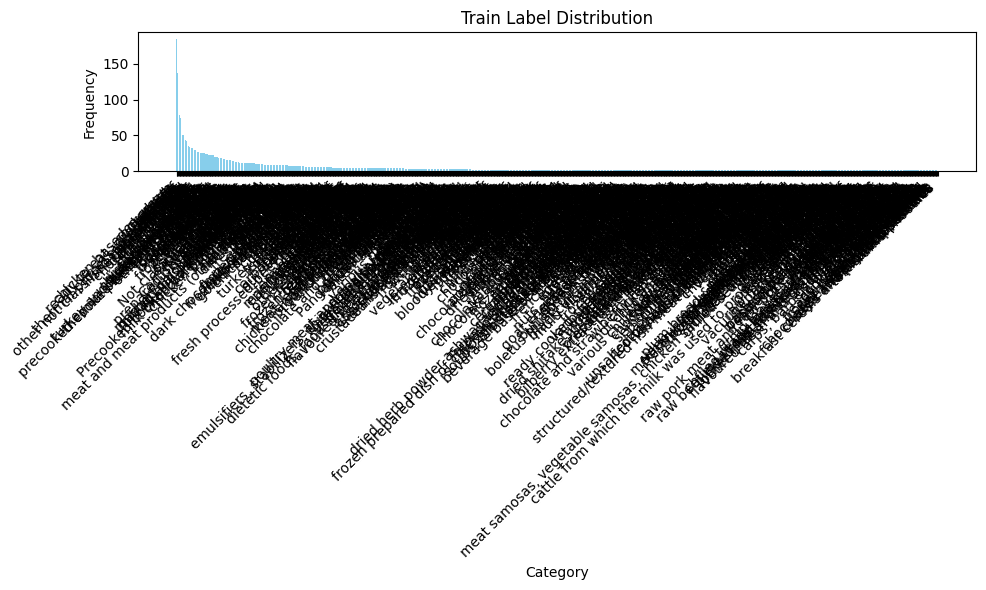

In [26]:
plot_categorical_frequencies(traindf['product'], title='Train Label Distribution')

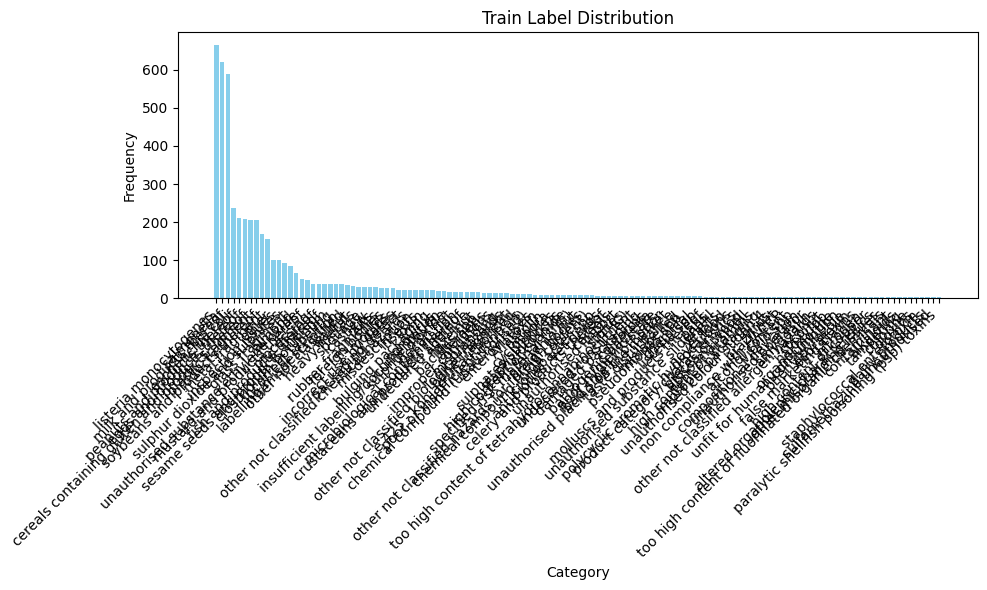

In [27]:
plot_categorical_frequencies(traindf['hazard'], title='Train Label Distribution')

In [43]:
import numpy as np
from scipy.stats import chi2_contingency

def compare_distributions(freq_map1, freq_map2, title="Comparison of Frequency Distributions"):
    # Union of all keys in both frequency maps
    all_keys = list(set(freq_map1.keys())) #.union(set(freq_map2.keys())))
    all_keys.sort()  # Optional: sort the keys for easier comparison

    # Get counts for each key, if a key is missing in a frequency map, use 0
    counts1 = [freq_map1.get(key, 0) for key in all_keys]
    counts2 = [freq_map2.get(key, 0) for key in all_keys]

    # Define the positions for the groups of bars
    x = np.arange(len(all_keys))
    width = 0.35  # Width of the bars

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bars for the first frequency map
    bars1 = ax.bar(x - width/2, counts1, width, label='Predictions')
    # Bars for the second frequency map
    bars2 = ax.bar(x + width/2, counts2, width, label='Train-Gold-label')

    contingency_table = np.array([counts1, counts2])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Add labels, title, and legend
    ax.set_xlabel('Categories')
    ax.set_ylabel('Counts')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(all_keys, rotation=45, ha='right')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print statistical results
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"P-Value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a statistically significant difference between the distributions (p < 0.05).")
    else:
        print("No statistically significant difference between the distributions (p >= 0.05).")


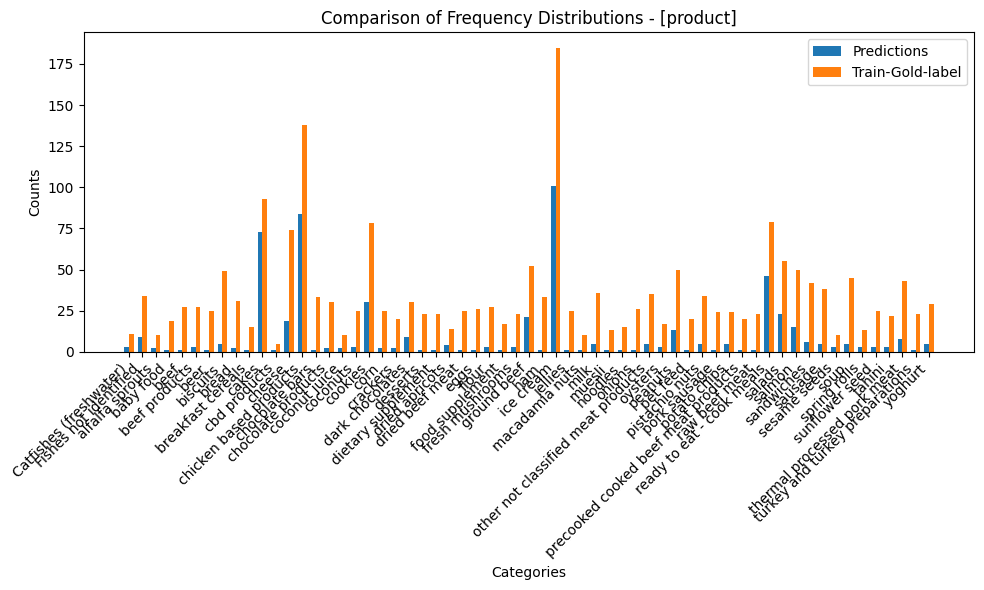

Chi-Square Statistic: 279.0010
P-Value: 0.0000
There is a statistically significant difference between the distributions (p < 0.05).


In [45]:

compare_distributions(Counter(concated_dev['product']), Counter(traindf['product']),
                      title="Comparison of Frequency Distributions - [product]")


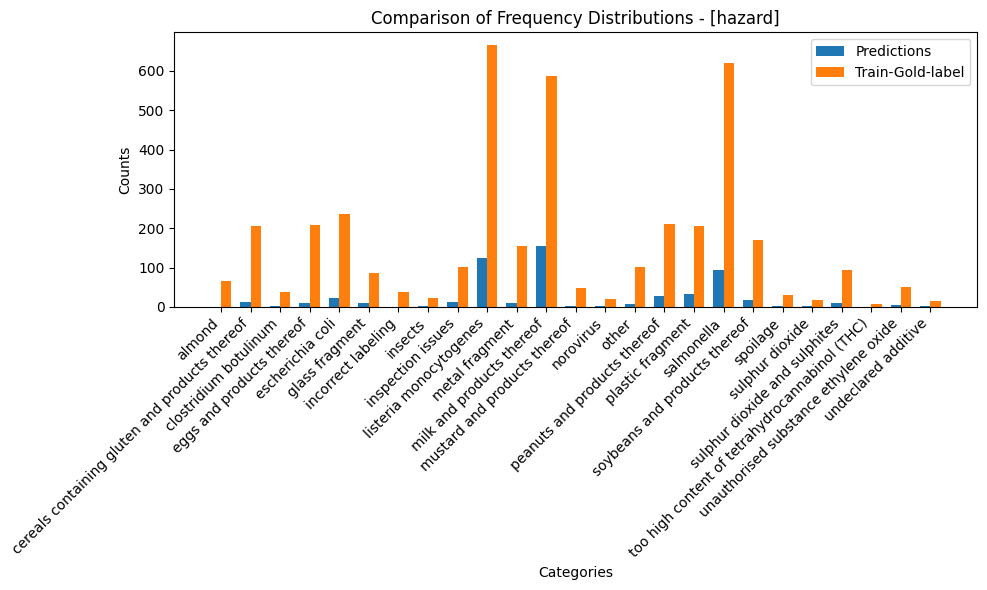

Chi-Square Statistic: 113.4856
P-Value: 0.0000
There is a statistically significant difference between the distributions (p < 0.05).


In [46]:

compare_distributions(Counter(concated_dev['hazard']), Counter(traindf['hazard']),
                      title="Comparison of Frequency Distributions - [hazard]")
